In [1]:
import sys
sys.path.append("..")

from dataset.CustomDataset import CustomDataset
#import train
import train_model_no_WS
from datetime import datetime

In [2]:
training_set = CustomDataset('./data/mnist/', train=True, nb=100)


In [3]:
training_set.input.shape

torch.Size([100, 2, 14, 14])

In [4]:
len(training_set)

100

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_model_no_WS = dict(
    logs_dir=f'./logs/no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    optimizer='Adam',
    optimizer_learning_rate=0.001,
    batch_size=128,
    num_epochs=50,  # 250
    model='simple_conv',
    class_num=10,
    channels_in=1,
    augmentation=False,
    verbose=1
)

model, history = train_model_no_WS.train(config_model_no_WS)

Reusing TensorBoard on port 6006 (pid 6033), started 1:31:06 ago. (Use '!kill 6033' to kill it.)

epoch [001] loss_train: 1.40e+00 loss_test: 6.45e-01 acc_train: 7.48e-01 acc_test: 8.56e-01
epoch [002] loss_train: 4.41e-01 loss_test: 3.29e-01 acc_train: 9.12e-01 acc_test: 9.33e-01
epoch [003] loss_train: 2.60e-01 loss_test: 2.43e-01 acc_train: 9.50e-01 acc_test: 9.45e-01
epoch [004] loss_train: 1.88e-01 loss_test: 1.96e-01 acc_train: 9.61e-01 acc_test: 9.56e-01
epoch [005] loss_train: 1.24e-01 loss_test: 1.81e-01 acc_train: 9.75e-01 acc_test: 9.62e-01
epoch [006] loss_train: 9.10e-02 loss_test: 1.46e-01 acc_train: 9.83e-01 acc_test: 9.63e-01
epoch [007] loss_train: 5.90e-02 loss_test: 1.44e-01 acc_train: 9.89e-01 acc_test: 9.64e-01
epoch [008] loss_train: 4.93e-02 loss_test: 1.42e-01 acc_train: 9.85e-01 acc_test: 9.65e-01
epoch [009] loss_train: 3.25e-02 loss_test: 1.42e-01 acc_train: 9.97e-01 acc_test: 9.70e-01
epoch [010] loss_train: 2.36e-02 loss_test: 1.34e-01 acc_train: 9.97e-01 acc_test: 9.72e-01
epoch [011] loss_train: 2.05e-02 loss_test: 1.55e-01 acc_train: 9.95e-01 acc_tes

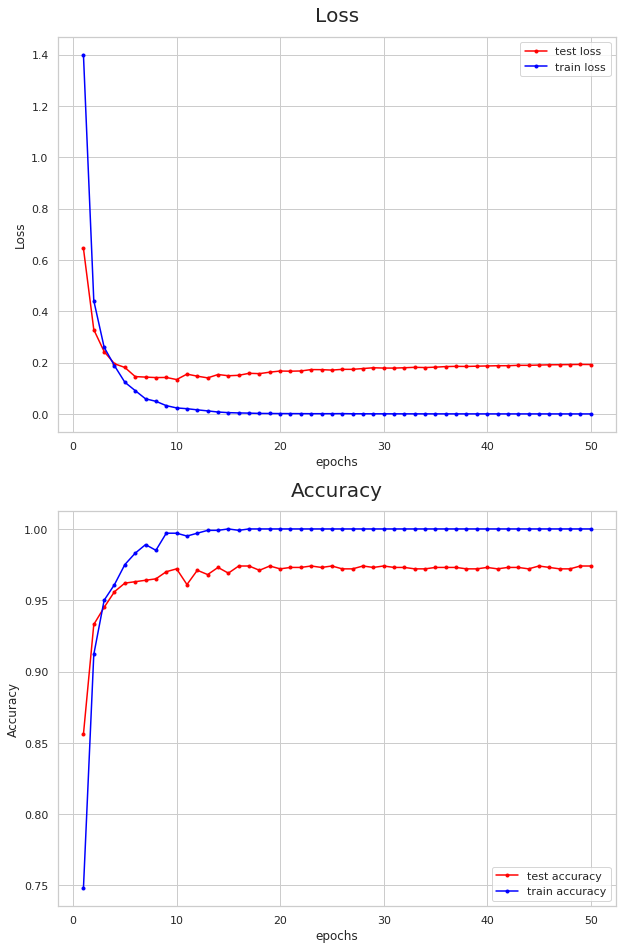

In [6]:
history.plot()